# Deep Gaussian Processes
### [Neil D. Lawrence](http://inverseprobability.com), Amazon Cambridge and University of Sheffield
### 2019-01-11

**Abstract**: Classical machine learning and statistical approaches to learning, such
as neural networks and linear regression, assume a parametric form for
functions. Gaussian process models are an alternative approach that
assumes a probabilistic prior over functions. This brings benefits, in
that uncertainty of function estimation is sustained throughout
inference, and some challenges: algorithms for fitting Gaussian
processes tend to be more complex than parametric models. In these
sessions I will introduce Gaussian processes and explain why sustaining
uncertainty is important. We’ll then look at some extensions of Gaussian
process models, in particular composition of Gaussian processes, or deep
Gaussian processes.

$$
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!--define{draft}-->
<!-- Enables links to pages-->
<!--ipynb-->

<!-- ipynb but not slides -->

<!--%%%%%%%%%% CODE DISPLAY %%%%%%%%%%-->
<div style="text-align:center;vertical-align:middle">

<img class="vertical-align:middle" src="../slides/diagrams/Planck_CMB.png" width="50%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<i>The cosmic microwave background is, to a very high degree of
precision, a Gaussian process. The parameters of its covariance function
are given by fundamental parameters of the universe, such as the amount
of dark matter and mass.</i>
</center>
<div style="fontsize:120px;vertical-align:middle">

<img src="../slides/diagrams/earth_PNG37.png" width="20%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$=f\Bigg($<img src="../slides/diagrams/Planck_CMB.png"  width="50%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$\Bigg)$

</div>

<center>
<i>What we observe today is some non-linear function of the cosmic
microwave background.</i>
</center>
<center>
<i>Image credit: Kai Arulkumaran</i>
</center>
Inference in a Gaussian process has computational complexity of
$\bigO(\numData^3)$ and storage demands of $\bigO(\numData^2)$. This is
too large for many modern data sets.

Low rank approximations allow us to work with Gaussian processes with
computational complexity of $\bigO(\numData\numInducing^2)$ and storage
demands of $\bigO(\numData\numInducing)$, where $\numInducing$ is a user
chosen parameter.

In machine learning, low rank approximations date back to
@Smola:sparsegp00, @Williams:nystrom00, who considered the Nystr"om
approximation and @Csato:sparse02;@Csato:thesis02 who considered low
rank approximations in the context of on-line learning. Selection of
active points for the approximation was considered by @Seeger:fast03 and
@Snelson:pseudo05 first proposed that the active set could be optimized
directly. Those approaches were reviewed by @Quinonero:unifying05 under
a unifying likelihood approximation perspective. General rules for
deriving the maximum likelihood for these sparse approximations were
given in @Lawrence:larger07.

Modern variational interpretations of these low rank approaches were
first explored in @Titsias:variational09. A more modern summary which
considers each of these approximations as an $\alpha$-divergence is
given by @Thang:unifying17.

### Variational Compression

Inducing variables are a compression of the real observations. The basic
idea is can I create a new data set that summarizes all the information
in the original data set. If this data set is smaller, I've compressed
the information in the original data set.

Inducing variables can be thought of as pseudo-data, indeed in
@Snelson:pseudo05 they were referred to as *pseudo-points*.

The only requirement for inducing variables is that they are jointly
distributed as a Gaussian process with the original data. This means
that they can be from the space $\mappingFunctionVector$ or a space that
is related through a linear operator (see e.g. @Alvarez:efficient10).
For example we could choose to store the gradient of the function at
particular points or a value from the frequency spectrum of the function
[@Lazaro:spectrum10].

### Variational Compression II

Inducing variables don't only allow for the compression of the
non-parameteric information into a reduced data aset but they also allow
for computational scaling of the algorithms through, for example
stochastic variational approaches @Hensman:bigdata13 or parallelization
@Gal:Distributed14,@Dai:gpu14, @Seeger:auto17.

<!--include{_gp/includes/larger-factorize.md}-->
We’ve seen how we go from parametric to non-parametric. The limit
implies infinite dimensional $\mappingVector$. Gaussian processes are
generally non-parametric: combine data with covariance function to get
model. This representation *cannot* be summarized by a parameter vector
of a fixed size.

Parametric models have a representation that does not respond to
increasing training set size. Bayesian posterior distributions over
parameters contain the information about the training data, for example
if we use use Bayes’ rule from training data, $$
p\left(\mappingVector|\dataVector, \inputMatrix\right),
$$ to make predictions on test data $$
p\left(\dataScalar_*|\inputMatrix_*, \dataVector, \inputMatrix\right) = \int
              p\left(\dataScalar_*|\mappingVector,\inputMatrix_*\right)p\left(\mappingVector|\dataVector,
                \inputMatrix)\text{d}\mappingVector\right)
$$ then $\mappingVector$ becomes a bottleneck for information about the
training set to pass to the test set. The solution is to increase
$\numBasisFunc$ so that the bottleneck is so large that it no longer
presents a problem. How big is big enough for $\numBasisFunc$?
Non-parametrics says $\numBasisFunc \rightarrow \infty$.

Now no longer possible to manipulate the model through the standard
parametric form. However, it *is* possible to express *parametric* as
GPs: $$
\kernelScalar\left(\inputVector_i,\inputVector_j\right)=\basisFunction_:\left(\inputVector_i\right)^\top\basisFunction_:\left(\inputVector_j\right).
$$ These are known as degenerate covariance matrices. Their rank is at
most $\numBasisFunc$, non-parametric models have full rank covariance
matrices. Most well known is the “linear kernel”, $$
\kernelScalar(\inputVector_i, \inputVector_j) = \inputVector_i^\top\inputVector_j.
$$ For non-parametrics prediction at a new point,
$\mappingFunctionVector_*$, is made by conditioning on
$\mappingFunctionVector$ in the joint distribution. In GPs this involves
combining the training data with the covariance function and the mean
function. Parametric is a special case when conditional prediction can
be summarized in a *fixed* number of parameters. Complexity of
parametric model remains fixed regardless of the size of our training
data set. For a non-parametric model the required number of parameters
grows with the size of the training data.

### Augment Variable Space

In inducing variable approximations, we augment the variable space with
a set of inducing points, $\inducingVector$. These inducing points are
jointly Gaussian distributed with the points from our function,
$\mappingFunctionVector$. So we have a joint Gaussian process with
covariance, $$
\begin{bmatrix}
\mappingFunctionVector\\
\inducingVector
\end{bmatrix} \sim \gaussianSamp{\zerosVector}{\kernelMatrix}
$$ where the kernel matrix itself can be decomposed into $$
\kernelMatrix =
\begin{bmatrix}
\Kff & \Kfu \\
\Kuf & \Kuu
\end{bmatrix}
$$

This defines a joint density between the original function points,
$\mappingFunctionVector$ and our inducing points, $\inducingVector$.
This can be decomposed through the product rule to give. $$
p(\mappingFunctionVector, \inducingVector) = p(\mappingFunctionVector| \inducingVector) p(\inducingVector)
$$ The Gaussian process is (typically) given by a noise corrupted form
of $\mappingFunctionVector$, i.e., $$
\dataScalar(\inputVector) = \mappingFunction(\inputVector) + \noiseScalar,
$$ which can be written probabilisticlly as, $$
p(\dataVector) = \int p(\dataVector|\mappingFunctionVector) p(\mappingFunctionVector) \text{d}\mappingFunctionVector,
$$ where for the independent case we have
$p(\dataVector | \mappingFunctionVector) = \prod_{i=1}^\numData p(\dataScalar_i|\mappingFunction_i)$.

Inducing variables are like auxilliary variables in Monte Carlo
algorithms. We introduce the inducing variables by augmenting this
integral with an additional integral over $\inducingVector$, $$
p(\dataVector) = \int p(\dataVector|\mappingFunctionVector) p(\mappingFunctionVector|\inducingVector)  p(\inducingVector)  \text{d}\inducingVector \text{d}\mappingFunctionVector.
$$ Now, conceptually speaking we are going to integrate out
\$\mappingFunctionVector\#, initially leaving \$\inducingVector in
place. This gives, $$
p(\dataVector) = \int p(\dataVector|\inducingVector)   p(\inducingVector)  \text{d}\inducingVector.
$$

Note the similarity between this form and our standard *parametric*
form. If we had defined our model through standard basis functions we
would have, $$
\dataScalar(\inputVector) = \weightVector^\top\basisVector(\inputVector) + \noiseScalar
$$ and the resulting probabilistic representation would be $$
p(\dataVector) = \int p(\dataVector|\weightVector) p(\weightVector) \text{d} \weightVector
$$ allowing us to predict $$
p(\dataVector^*|\dataVector) = \int p(\dataVector^*|\weightVector) p(\weightVector|\dataVector) \text{d} \weightVector
$$

The new prediction algorithm involves $$
p(\dataVector^*|\dataVector) = \int p(\dataVector^*|\inducingVector) p(\inducingVector|\dataVector) \text{d} \inducingVector
$$ but *importantly* the length of $\inducingVector$ is not fixed at
*design* time like the number of parameters were. We can vary the number
of inducing variables we use to give us the model capacity we require.

Unfortunately, computation of $p(\dataVector|\inducingVector)$ turns out
to be intractable. As a result, we need to turn to approximations to
make progress.

### Variational Bound on $p(\dataVector |\inducingVector)$

The conditional density of the data given the inducing points can be
*lower* bounded variationally $$
\begin{aligned}
    \log p(\dataVector|\inducingVector) & = \log \int p(\dataVector|\mappingFunctionVector) p(\mappingFunctionVector|\inducingVector) \text{d}\mappingFunctionVector\\ & = \int q(\mappingFunctionVector) \log \frac{p(\dataVector|\mappingFunctionVector) p(\mappingFunctionVector|\inducingVector)}{q(\mappingFunctionVector)}\text{d}\mappingFunctionVector + \KL{q(\mappingFunctionVector)}{p(\mappingFunctionVector|\dataVector, \inducingVector)}.
\end{aligned}
$$

The key innovation from @Titsias:variational09 was to then make a
particular choice for $q(\mappingFunctionVector)$. If we set
$q(\mappingFunctionVector)=p(\mappingFunctionVector|\inducingVector)$,
$$
  \log p(\dataVector|\inducingVector) \geq \log \int p(\mappingFunctionVector|\inducingVector) \log p(\dataVector|\mappingFunctionVector)\text{d}\mappingFunctionVector.
  $$ $$
  p(\dataVector|\inducingVector) \geq \exp \int p(\mappingFunctionVector|\inducingVector) \log p(\dataVector|\mappingFunctionVector)\text{d}\mappingFunctionVector.
  $$

### Optimal Compression in Inducing Variables

Maximizing the lower bound minimizes the Kullback-Leibler divergence (or
*information gain*) between our approximating density,
$p(\mappingFunctionVector|\inducingVector)$ and the true posterior
density, $p(\mappingFunctionVector|\dataVector, \inducingVector)$.

$$
  \KL{p(\mappingFunctionVector|\inducingVector)}{p(\mappingFunctionVector|\dataVector, \inducingVector)} = \int p(\mappingFunctionVector|\inducingVector) \log \frac{p(\mappingFunctionVector|\inducingVector)}{p(\mappingFunctionVector|\dataVector, \inducingVector)}\text{d}\inducingVector
  $$

This bound is minimized when the information stored about $\dataVector$
is already stored in $\inducingVector$. In other words, maximizing the
bound seeks an *optimal compression* from the *information gain*
perspective.

For the case where $\inducingVector = \mappingFunctionVector$ the bound
is exact ($\mappingFunctionVector$ $d$-separates $\dataVector$ from
$\inducingVector$).

### Choice of Inducing Variables

The quality of the resulting bound is determined by the choice of the
inducing variables. You are free to choose whichever heuristics you like
for the inducing variables, as long as they are drawn jointly from a
valid Gaussian process, i.e. such that $$
\begin{bmatrix}
\mappingFunctionVector\\
\inducingVector
\end{bmatrix} \sim \gaussianSamp{\zerosVector}{\kernelMatrix}
$$ where the kernel matrix itself can be decomposed into $$
\kernelMatrix =
\begin{bmatrix}
\Kff & \Kfu \\
\Kuf & \Kuu
\end{bmatrix}
$$ Choosing the inducing variables amounts to specifying $\Kfu$ and
$\Kuu$ such that $\kernelMatrix$ remains positive definite. The typical
choice is to choose $\inducingVector$ in the same domain as
$\mappingFunctionVector$, associating each inducing output,
$\inducingScalar_i$ with a corresponding input location
$\inducingInputVector$. However, more imaginative choices are absolutely
possible. In particular, if $\inducingVector$ is related to
$\mappingFunctionVector$ through a linear operator (see e.g.
@Alvarez:efficient10), then valid $\Kuu$ and $\Kuf$ can be constructed.
For example we could choose to store the gradient of the function at
particular points or a value from the frequency spectrum of the function
[@Lazaro:spectrum10].

### Variational Compression II

Inducing variables don't only allow for the compression of the
non-parameteric information into a reduced data set but they also allow
for computational scaling of the algorithms through, for example
stochastic variational
approaches[@Hoffman:stochastic12; @Hensman:bigdata13] or parallelization
@Gal:Distributed14,@Dai:gpu14, @Seeger:auto17.

<!--include{_gp/includes/larger-graph-intro.md}-->
### A Simple Regression Problem

Here we set up a simple one dimensional regression problem. The input
locations, $\inputMatrix$, are in two separate clusters. The response
variable, $\dataVector$, is sampled from a Gaussian process with an
exponentiated quadratic covariance.

In [ ]:
import numpy as np
import GPy

In [ ]:
np.random.seed(101)

In [ ]:
N = 50
noise_var = 0.01
X = np.zeros((50, 1))
X[:25, :] = np.linspace(0,3,25)[:,None] # First cluster of inputs/covariates
X[25:, :] = np.linspace(7,10,25)[:,None] # Second cluster of inputs/covariates

# Sample response variables from a Gaussian process with exponentiated quadratic covariance.
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

First we perform a full Gaussian process regression on the data. We
create a GP model, `m_full`, and fit it to the data, plotting the
resulting fit.

In [ ]:
m_full = GPy.models.GPRegression(X,y)
_ = m_full.optimize(messages=True) # Optimize parameters of covariance function

In [ ]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot 
from gp_tutorial import gpplot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-full-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/sparse-demo-full-gp.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Full Gaussian process fitted to the data set.</i>
</center>
Now we set up the inducing variables, $\mathbf{u}$. Each inducing
variable has its own associated input index, $\mathbf{Z}$, which lives
in the same space as $\inputMatrix$. Here we are using the true
covariance function parameters to generate the fit.

In [ ]:
kern = GPy.kern.RBF(1)
Z = np.hstack(
        (np.linspace(2.5,4.,3),
        np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,kernel=kern,Z=Z)
m.noise_var = noise_var
m.inducing_inputs.constrain_fixed()
display(m)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Sparse Gaussian process fitted with six inducing variables, no
optimization of parameters or inducing variables.</i>
</center>

In [ ]:
_ = m.optimize(messages=True)
display(m)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-constrained-inducing-6-learned-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/sparse-demo-constrained-inducing-6-learned-gp.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Gaussian process fitted with inducing variables fixed and parameters
optimized</i>
</center>

In [ ]:
m.randomize()
m.inducing_inputs.unconstrain()
_ = m.optimize(messages=True)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2,xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-unconstrained-inducing-6-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/sparse-demo-unconstrained-inducing-6-gp.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Gaussian process fitted with location of inducing variables and
parameters both optimized</i>
</center>
Now we will vary the number of inducing points used to form the
approximation.

In [ ]:
m.num_inducing=8
m.randomize()
M = 8
m.set_Z(np.random.rand(M,1)*12)

_ = m.optimize(messages=True)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/sparse-demo-sparse-inducing-8-gp.svg', 
                  transparent=True, frameon=True)

<center>
<i>Comparison of the full Gaussian process fit with a sparse Gaussian
process using eight inducing varibles. Both inducing variables and
parameters are optimized.</i>
</center>
And we can compare the probability of the result to the full model.

In [ ]:
print(m.log_likelihood(), m_full.log_likelihood())

-   Let’s be explicity about storing approximate posterior of
    $\inducingVector$, $q(\inducingVector)$.
-   Now we have
    $$p(\dataVector^*|\dataVector) = \int p(\dataVector^*| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$

-   Inducing variables look a lot like regular parameters.
-   *But*: their dimensionality does not need to be set at design time.
-   They can be modified arbitrarily at run time without effecting the
    model likelihood.
-   They only effect the quality of compression and the lower bound.

-   Exploit the resulting factorization ...
    $$p(\dataVector^*|\dataVector) = \int p(\dataVector^*| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$
    \pause
-   The distribution now *factorizes*:
    $$p(\dataVector^*|\dataVector) = \int \prod_{i=1}^{\numData^*}p(\dataScalar^*_i| \inducingVector) q(\inducingVector | \dataVector) \text{d} \inducingVector$$
-   This factorization can be exploited for stochastic variational
    inference [@Hoffman:stochastic12].

<center>
Modern data availability
</center>
<div style="text-align:center;vertical-align:middle">

<img class="negate" src="../slides/diagrams/ml/house_price_country.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
Proxy for index of deprivation?
</center>
<div style="text-align:center;vertical-align:middle">

<img class="negate" src="../slides/diagrams/ml/house_price_peak_district.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
Actually index of deprivation is a proxy for this ...
</center>
<div style="text-align:center;vertical-align:middle">

<img class="negate" src="../slides/diagrams/ml/house_price_peak_district.png" width="60%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

\catdoc
<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px);vertical-align:middle">
<table>
<tr>
<td width>
[[@Hensman:bigdata13]]{style="text-align:left"}
</td>
<td width>
[<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1.5cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px);vertical-align:middle">]{style="text-align:right"}
</td>
</tr>
</table>
<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/health/244_1_clip.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<http://auai.org/uai2013/prints/papers/244.pdf>
</center>
<table>
<tr>
<td width>
[[@Hensman:bigdata13]]{style="text-align:left"}
</td>
<td width>
[<img class="" src="../slides/diagrams/people/2013_03_28_180606.JPG" width="1.5cm" align="" style="background:none; border:none; box-shadow:none; position:absolute; clip:rect(100px,2369px,2200px,1370px);vertical-align:middle">]{style="text-align:right"}
</td>
</tr>
</table>
<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/health/244_6_clip.png" width="90%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<http://auai.org/uai2013/prints/papers/244.pdf>
</center>
-   *A Unifying Framework for Gaussian Process Pseudo-Point
    Approximations using Power Expectation Propagation*
    @Thang:unifying17

-   *Deep Gaussian Processes and Variational Propagation of Uncertainty*
    @Damianou:thesis2015

Even in the early days of Gaussian processes in machine learning, it was
understood that we were throwing something fundamental away. This is
perhaps captured best by David MacKay in his 1997 NeurIPS tutorial on
Gaussian processes, where he asked "Have we thrown out the baby with the
bathwater?". The quote below is from his summarization paper.

> According to the hype of 1987, neural networks were meant to be
> intelligent models which discovered features and patterns in data.
> Gaussian processes in contrast are simply smoothing devices. How can
> Gaussian processes possibly repalce neural networks? What is going on?
>
> @MacKay:gpintroduction98

bathwater?” [Published as @MacKay:gpintroduction98]}

In [ ]:
import teaching_plots as plot

<center>
<i>A deep neural network. Input nodes are shown at the bottom. Each
hidden layer is the result of applying an affine transformation to the
previous layer and placing through an activation function.</i>
</center>
Mathematically, each layer of a neural network is given through
computing the activation function, $\basisFunction(\cdot)$, contingent
on the previous layer, or the inputs. In this way the activation
functions, are composed to generate more complex interactions than would
be possible with any single layer. $$
\begin{align}
    \hiddenVector_{1} &= \basisFunction\left(\mappingMatrix_1 \inputVector\right)\\
    \hiddenVector_{2} &=  \basisFunction\left(\mappingMatrix_2\hiddenVector_{1}\right)\\
    \hiddenVector_{3} &= \basisFunction\left(\mappingMatrix_3 \hiddenVector_{2}\right)\\
    \dataVector &= \mappingVector_4 ^\top\hiddenVector_{3}
\end{align}
$$

### Overfitting

One potential problem is that as the number of nodes in two adjacent
layers increases, the number of parameters in the affine transformation
between layers, $\mappingMatrix$, increases. If there are $k_{i-1}$
nodes in one layer, and $k_i$ nodes in the following, then that matrix
contains $k_i k_{i-1}$ parameters, when we have layer widths in the
1000s that leads to millions of parameters.

One proposed solution is known as *dropout* where only a sub-set of the
neural network is trained at each iteration. An alternative solution
would be to reparameterize $\mappingMatrix$ with its *singular value
decomposition*. $$
  \mappingMatrix = \eigenvectorMatrix\eigenvalueMatrix\eigenvectwoMatrix^\top
  $$ or $$
  \mappingMatrix = \eigenvectorMatrix\eigenvectwoMatrix^\top
  $$ where if $\mappingMatrix \in \Re^{k_1\times k_2}$ then
$\eigenvectorMatrix\in \Re^{k_1\times q}$ and
$\eigenvectwoMatrix \in \Re^{k_2\times q}$, i.e. we have a low rank
matrix factorization for the weights.

In [ ]:
import teaching_plots as plot

<img src="../slides/diagrams/wisuvt.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Pictorial representation of the low rank form of the matrix
$\mappingMatrix$</i>
</center>

In [ ]:
import teaching_plots as plot

Including the low rank decomposition of $\mappingMatrix$ in the neural
network, we obtain a new mathematical form. Effectively, we are adding
additional *latent* layers, $\latentVector$, in between each of the
existing hidden layers. In a neural network these are sometimes known as
*bottleneck* layers. The network can now be written mathematically as $$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \hiddenVector_{1} &= \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \hiddenVector_{1}\\
  \hiddenVector_{2} &= \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \hiddenVector_{2}\\
  \hiddenVector_{3} &= \basisFunction\left(\eigenvectorMatrix_3 \latentVector_{3}\right)\\
  \dataVector &= \mappingVector_4^\top\hiddenVector_{3}.
\end{align}
$$

$$
\begin{align}
  \latentVector_{1} &= \eigenvectwoMatrix^\top_1 \inputVector\\
  \latentVector_{2} &= \eigenvectwoMatrix^\top_2 \basisFunction\left(\eigenvectorMatrix_1 \latentVector_{1}\right)\\
  \latentVector_{3} &= \eigenvectwoMatrix^\top_3 \basisFunction\left(\eigenvectorMatrix_2 \latentVector_{2}\right)\\
  \dataVector &= \mappingVector_4 ^\top \latentVector_{3}
\end{align}
$$

Now if we replace each of these neural networks with a Gaussian process.
This is equivalent to taking the limit as the width of each layer goes
to infinity, while appropriately scaling down the outputs.

$$
\begin{align}
  \latentVector_{1} &= \mappingFunctionVector_1\left(\inputVector\right)\\
  \latentVector_{2} &= \mappingFunctionVector_2\left(\latentVector_{1}\right)\\
  \latentVector_{3} &= \mappingFunctionVector_3\left(\latentVector_{2}\right)\\
  \dataVector &= \mappingFunctionVector_4\left(\latentVector_{3}\right)
\end{align}
$$

<div style="width:100%;text-align:center">

<img class="" src="../slides/diagrams/deepface_neg.png" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<i>The DeepFace architecture [@Taigman:deepface14], visualized through
colors to represent the functional mappings at each layer. There are 120
million parameters in the model.</i>
</center>
The DeepFace architecture [@Taigman:deepface14] consists of layers that
deal with *translation* and *rotational* invariances. These layers are
followed by three locally-connected layers and two fully-connected
layers. Color illustrates feature maps produced at each layer. The net
includes more than 120 million parameters, where more than 95% come from
the local and fully connected layers.

<div style="height:600px;text-align:center">

<img class="" src="../slides/diagrams/576px-Early_Pinball.jpg" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<i>Deep learning models are composition of simple functions. We can
think of a pinball machine as an analogy. Each layer of pins corresponds
to one of the layers of functions in the model. Input data is
represented by the location of the ball from left to right when it is
dropped in from the top. Output class comes from the position of the
ball as it leaves the pins at the bottom.</i>
</center>
We can think of what these models are doing as being similar to early
pin ball machines. In a neural network, we input a number (or numbers),
whereas in pinball, we input a ball. The location of the ball on the
left-right axis can be thought of as the number. As the ball falls
through the machine, each layer of pins can be thought of as a different
layer of neurons. Each layer acts to move the ball from left to right.

In a pinball machine, when the ball gets to the bottom it might fall
into a hole defining a score, in a neural network, that is equivalent to
the decision: a classification of the input object.

An image has more than one number associated with it, so it's like
playing pinball in a *hyper-space*.

In [ ]:
import pods
from ipywidgets import IntSlider

In [ ]:
pods.notebook.display_plots('pinball{sample:0>3}.svg', 
                            '../slides/diagrams',  
                            sample=IntSlider(1, 1, 2, 1))

<div style="text-align:center">

<img src="../slides/diagrams/pinball001.svg" class="" align="" style="vertical-align:middle;">

</div>

<center>
<i>At initialization, the pins, which represent the parameters of the
function, aren't in the right place to bring the balls to the correct
decisions.</i>
</center>
<div style="text-align:center">

<img src="../slides/diagrams/pinball002.svg" class="" align="" style="vertical-align:middle;">

</div>

<center>
<i>After learning the pins are now in the right place to bring the balls
to the correct decisions.</i>
</center>
Learning involves moving all the pins to be in the right position, so
that the ball falls in the right place. But moving all these pins in
hyperspace can be difficult. In a hyper space you have to put a lot of
data through the machine for to explore the positions of all the pins.
Adversarial learning reflects the fact that a ball can be moved a small
distance and lead to a very different result.

Probabilistic methods explore more of the space by considering a range
of possible paths for the ball through the machine.

Mathematically, a deep Gaussian process can be seen as a composite
*multivariate* function, $$
  \mathbf{g}(\inputVector)=\mappingFunctionVector_5(\mappingFunctionVector_4(\mappingFunctionVector_3(\mappingFunctionVector_2(\mappingFunctionVector_1(\inputVector))))).
  $$ Or if we view it from the probabilistic perspective we can see that
a deep Gaussian process is specifying a factorization of the joint
density, the standard deep model takes the form of a Markov chain.

In [ ]:
from matplotlib import rc

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':30})
rc("text", usetex=True)

$$
  p(\dataVector|\inputVector)= p(\dataVector|\mappingFunctionVector_5)p(\mappingFunctionVector_5|\mappingFunctionVector_4)p(\mappingFunctionVector_4|\mappingFunctionVector_3)p(\mappingFunctionVector_3|\mappingFunctionVector_2)p(\mappingFunctionVector_2|\mappingFunctionVector_1)p(\mappingFunctionVector_1|\inputVector)
  $$

<img src="../slides/diagrams/deepgp/deep-markov.svg" class="" align="" style="vertical-align:middle;">
<center>
<i>Probabilistically the deep Gaussian process can be represented as a
Markov chain.</i>
</center>

In [ ]:
from matplotlib import rc
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':15})
rc("text", usetex=True)

<img src="../slides/diagrams/deepgp/deep-markov-vertical.svg" class="" align="" style="vertical-align:middle;">

### Why Deep?

If the result of composing many functions together is simply another
function, then why do we bother? The key point is that we can change the
class of functions we are modeling by composing in this manner. A
Gaussian process is specifying a prior over functions, and one with a
number of elegant properties. For example, the derivative process (if it
exists) of a Gaussian process is also Gaussian distributed. That makes
it easy to assimilate, for example, derivative observations. But that
also might raise some alarm bells. That implies that the *marginal
derivative distribution* is also Gaussian distributed. If that's the
case, then it means that functions which occasionally exhibit very large
derivatives are hard to model with a Gaussian process. For example, a
function with jumps in.

A one off discontinuity is easy to model with a Gaussian process, or
even multiple discontinuities. They can be introduced in the mean
function, or independence can be forced between two covariance functions
that apply in different areas of the input space. But in these cases we
will need to specify the number of discontinuities and where they occur.
In otherwords we need to *parameterise* the discontinuities. If we do
not know the number of discontinuities and don't wish to specify where
they occur, i.e. if we want a non-parametric representation of
discontinuities, then the standard Gaussian process doesn't help.

### Stochastic Process Composition

The deep Gaussian process leads to *non-Gaussian* models, and
non-Gaussian characteristics in the covariance function. In effect, what
we are proposing is that we change the properties of the functions we
are considering by \*composing stochastic processes\$. This is an
approach to creating new stochastic processes from well known processes.

<img src="../slides/diagrams/deepgp/deep-markov-vertical.svg" class="" align="" style="vertical-align:middle;">

Additionally, we are not constrained to the formalism of the chain. For
example, we can easily add single nodes emerging from some point in the
depth of the chain. This allows us to combine the benefits of the
graphical modelling formalism, but with a powerful framework for
relating one set of variables to another, that of Gaussian processes
<img src="../slides/diagrams/deepgp/deep-markov-vertical-side.svg" class="" align="" style="vertical-align:middle;">

### Difficulty for Probabilistic Approaches

The challenge for composition of probabilistic models is that you need
to propagate a probability densities through non linear mappings. This
allows you to create broader classes of probability density.
Unfortunately it renders the resulting densities *intractable*.
<img src="../slides/diagrams/dimred/nonlinear-mapping-3d-plot.svg" class="" align="center" style="vertical-align:middle;">

<img src="../slides/diagrams/dimred/nonlinear-mapping-2d-plot.svg" class="" align="center" style="vertical-align:middle;">

<img src="../slides/diagrams/dimred/gaussian-through-nonlinear.svg" class="" align="center" style="vertical-align:middle;">

The argument in the deep learning revolution is that deep architectures
allow us to develop an abstraction of the feature set through model
composition. Composing Gaussian processes is analytically intractable.
To form deep Gaussian processes we use a variational approach to stack
the models.

In [ ]:
import pods

In [ ]:
pods.notebook.display_plots('stack-gp-sample-Linear-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

### Stacked PCA

<center>
<i>Composition of linear functions just leads to a new linear
function.</i>
</center>
Stacking a series of linear functions simply leads to a new linear
function. The use of multiple linear function merely changes the
covariance of the resulting Gaussian. If $$
\latentMatrix \sim \gaussianSamp{\zerosVector}{\eye}
$$ and the $i$th hidden layer is a multivariate linear transformation
defined by $\weightMatrix_i$, $$
\dataMatrix = \latentMatrix\weightMatrix_1 \weightMatrix_2 \dots \weightMatrix_\numLayers
$$ then the rules of multivariate Gaussians tell us that $$
\dataMatrix \sim \gaussianSamp{\zerosVector}{\weightMatrix_\numLayers \dots \weightMatrix_1 \weightMatrix^\top_1 \dots \weightMatrix^\top_\numLayers}.
$$ So the model can be replaced by one where we set
$\vMatrix = \weightMatrix_\numLayers \dots \weightMatrix_2 \weightMatrix_1$.
So is such a model trivial? The answer is that it depends. There are two
cases in which such a model remaisn interesting. Firstly, if we make
intermediate observations stemming from the chain. So, for example, if
we decide that, $$
\latentMatrix_i = \weightMatrix_i \latentMatrix_{i-1}
$$ and set
$\latentMatrix_{0} = \inputMatrix \sim \gaussianSamp{\zerosVector}{\eye}$,
then the matrices $\weightMatrix$ inter-relate a series of jointly
Gaussian observations in an interesting way, stacking the full data
matrix to give $$
\latentMatrix = \begin{bmatrix}
\latentMatrix_0 \\
\latentMatrix_1 \\
\vdots \\
\latentMatrix_\numLayers
\end{bmatrix}
$$ we can obtain
$$\latentMatrix \sim \gaussianSamp{\zerosVector}{\begin{bmatrix}
\eye & \weightMatrix^\top_1 & \weightMatrix_1^\top\weightMatrix_2^\top & \dots & \vMatrix^\top \\
\weightMatrix_1 & \weightMatrix_1 \weightMatrix_1^\top & \weightMatrix_1 \weightMatrix_1^\top \weightMatrix_2^\top & \dots & \weightMatrix_1 \vMatrix^\top \\
\weightMatrix_2 \weightMatrix_1 & \weightMatrix_2 \weightMatrix_1 \weightMatrix_1^\top & \weightMatrix_2 \weightMatrix_1 \weightMatrix_1^\top \weightMatrix_2^\top & \dots & \weightMatrix_2 \weightMatrix_1 \vMatrix^\top \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\vMatrix & \vMatrix   \weightMatrix_1^\top  & \vMatrix \weightMatrix_1^\top \weightMatrix_2^\top& \dots & \vMatrix\vMatrix^\top
\end{bmatrix}}$$ which is a highly structured Gaussian covariance with
hierarchical dependencies between the variables $\latentMatrix_i$.

### Stacked GP

In [ ]:
pods.notebook.display_plots('stack-gp-sample-RBF-{sample:0>1}.svg', 
                            directory='../../slides/diagrams/deepgp', sample=(0,4))

<center>
<i>Stacking Gaussian process models leads to non linear mappings at each
stage. Here we are mapping from two dimensions to two dimensions in each
layer.</i>
</center>
Note that once the box has folded over on itself, it cannot be unfolded.
So a feature that is generated near the top of the model cannot be
removed furthr down the model.

This folding over effect happens in low dimensions. In higher dimensions
it is less common.

Observation of this effect at a talk in Cambridge was one of the things
that caused David Duvenaud (and collaborators) to consider the behavior
of deeper Gaussian process models [@Duvenaud:pathologies14].

Such folding over in the latent spaces necessarily forces the density to
be non-Gaussian. Indeed, since folding-over is avoided as we increase
the dimensionality of the latent spaces, such processes become more
Gaussian. If we take the limit of the latent space dimensionality as it
tends to infinity, the entire deep Gaussian process returns to a
standard Gaussian process, with a covariance function given as a deep
kernel (such as those described by @Cho:deep09).

Further analysis of these deep networks has been conducted by
@Dunlop:deep2017, who use analysis of the deep network's stationary
density (treating it as a Markov chain across layers), to explore the
nature of the implied process prior for a deep GP.

Both of these works, however, make constraining assumptions on the form
of the Gaussian process prior at each layer (e.g. same covariance at
each layer). In practice, the form of this covariance can be learnt and
the densities described by the deep GP are more general than those
mentioned in either of these papers.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('XhIvygQYFFQ')

David Duvenaud also created a YouTube video to help visualize what
happens as you drop through the layers of a deep GP.

### GPy: A Gaussian Process Framework in Python

<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/gp/gpy.png" width="70%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is avaialble on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e. you specify the model rather than the algorithm. As well as a large
range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The GPy library can be installed via pip:

In [ ]:
pip install GPy

This notebook depends on PyDeepGP. These libraries can be installed via
pip:

In [ ]:
pip install git+https://github.com/SheffieldML/PyDeepGP.git

### Olympic Marathon Data

<table>
<tr>
<td width="70%">
-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">
<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/Stephen_Kiprotich.jpg" width="100%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<small>Image from Wikimedia Commons <http://bit.ly/16kMKHQ></small>
</td>
</tr>
</table>
The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:

xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='../slides/diagrams/datasets/olympic-marathon.svg', 
                  transparent=True, 
                  frameon=True)

<div style="text-align:center">

<img src="../slides/diagrams/datasets/olympic-marathon.svg" class="" align="" style="vertical-align:middle;">

</div>

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

Data is fine for answering very specific questions, like "Who won the
Olympic Marathon in 2012?", because we have that answer stored, however,
we are not given the answer to many other questions. For example, Alan
Turing was a formidable marathon runner, in 1946 he ran a time 2 hours
46 minutes (just under four minutes per kilometer, faster than I and
most of the other [Endcliffe Park
Run](http://www.parkrun.org.uk/sheffieldhallam/) runners can do 5 km).
What is the probability he would have won an Olympics if one had been
held in 1946?

<table>
<tr>
<td width="40%">
<img class="" src="../slides/diagrams/turing-run.jpg" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">
</td>
<td width="50%">
<img class="" src="../slides/diagrams/turing-times.gif" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">
</td>
</tr>
</table>
<center>
<i>Alan Turing, in 1946 he was only 11 minutes slower than the winner of
the 1948 games. Would he have won a hypothetical games held in 1946?
Source: [Alan Turing Internet
Scrapbook](http://www.turing.org.uk/scrapbook/run.html)</i>
</center>
Our first objective will be to perform a Gaussian process fit to the
data, we'll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [ ]:
import GPy

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

The first command sets up the model, then `m_full.optimize()` optimizes
the parameters of the covariance function and the noise level of the
model. Once the fit is complete, we'll try creating some test points,
and computing the output of the GP model in terms of the mean and
standard deviation of the posterior functions between 1870 and 2030. We
plot the mean function and the standard deviation at 200 locations. We
can obtain the predictions using `y_mean, y_var = m_full.predict(xt)`

In [ ]:
xt = np.linspace(1870,2030,200)[:,np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `teaching_plots`.

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/olympic-marathon-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/olympic-marathon-gp.svg" class="" align="" style="vertical-align:middle;">

### Fit Quality

In the fit we see that the error bars (coming mainly from the noise
variance) are quite large. This is likely due to the outlier point in
1904, ignoring that point we can see that a tighter fit is obtained. To
see this making a version of the model, `m_clean`, where that point is
removed.

In [ ]:
x_clean=np.vstack((x[0:2, :], x[3:, :]))
y_clean=np.vstack((y[0:2, :], y[3:, :]))

m_clean = GPy.models.GPRegression(x_clean,y_clean)
_ = m_clean.optimize()

### Deep GP Fit

Let's see if a deep Gaussian process can help here. We will construct a
deep Gaussian process with one hidden layer (i.e. one Gaussian process
feeding into another).

Build a Deep GP with an additional hidden layer (one dimensional) to fit
the model.

In [ ]:
import GPy
import deepgp

In [ ]:
hidden = 1
m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

Deep Gaussian process models also can require some thought in
initialization. Here we choose to start by setting the noise variance to
be one percent of the data variance.

Optimization requires moving variational parameters in the hidden layer
representing the mean and variance of the expected values in that layer.
Since all those values can be scaled up, and this only results in a
downscaling in the output of the first GP, and a downscaling of the
input length scale to the second GP. It makes sense to first of all fix
the scales of the covariance function in each of the GPs.

Sometimes, deep Gaussian processes can find a local minima which
involves increasing the noise level of one or more of the GPs. This
often occurs because it allows a minimum in the KL divergence term in
the lower bound on the likelihood. To avoid this minimum we habitually
train with the likelihood variance (the noise on the output of the GP)
fixed to some lower value for some iterations.

Let's create a helper function to initialize the models we use in the
notebook.

In [ ]:
import deepgp

In [ ]:
%load -s initialize deepgp_tutorial.py

In [ ]:
# Bind the new method to the Deep GP object.
deepgp.DeepGP.initialize=initialize

In [ ]:
# Call the initalization
m.initialize()

Now optimize the model. The first stage of optimization is working on
variational parameters and lengthscales only.

In [ ]:
m.optimize(messages=False,max_iters=100)

Now we remove the constraints on the scale of the covariance functions
associated with each GP and optimize again.

In [ ]:
for layer in m.layers:
    pass #layer.kern.variance.constrain_positive(warning=False)
m.obslayer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)

Finally, we allow the noise variance to change and optimize for a large
number of iterations.

In [ ]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

For our optimization process we define a new function.

In [ ]:
%load -s staged_optimize deepgp_tutorial.py

In [ ]:
# Bind the new method to the Deep GP object.
deepgp.DeepGP.staged_optimize=staged_optimize

In [ ]:
m.staged_optimize(messages=(True,True,True))

### Plot the prediction

The prediction of the deep GP can be extracted in a similar way to the
normal GP. Although, in this case, it is an approximation to the true
distribution, because the true distribution is not Gaussian.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', 
          fontsize=20, portion=0.2)
ax.set_xlim(xlim)

ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp.svg', 
                transparent=True, frameon=True)

### Olympic Marathon Data Deep GP

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
%load -s posterior_sample deepgp_tutorial.py

In [ ]:
deepgp.DeepGP.posterior_sample = posterior_sample

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, 
                  xlabel='year', ylabel='pace min/km', portion = 0.225)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Olympic Marathon Data Deep GP

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

### Fitted GP for each layer

Now we explore the GPs the model has used to fit each layer. First of
all, we look at the hidden layer.

In [ ]:
%load -s visualize deepgp_tutorial.py

In [ ]:
# Bind the new method to the Deep GP object.
deepgp.DeepGP.visualize=visualize

In [ ]:
m.visualize(scale=scale, offset=offset, xlabel='year',
            ylabel='pace min/km',xlim=xlim, ylim=ylim,
            dataset='olympic-marathon',
            diagrams='../slides/diagrams/deepgp')

In [ ]:
import pods

In [ ]:
pods.notebook.display_plots('olympic-marathon-deep-gp-layer-{sample:0>1}.svg', 
                            '../slides/diagrams/deepgp', sample=(0,1))

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-0.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-layer-1.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
%load -s visualize_pinball deepgp_tutorial.py

In [ ]:
# Bind the new method to the Deep GP object.
deepgp.DeepGP.visualize_pinball=visualize_pinball

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, scale=scale, offset=offset, points=30, portion=0.1,
                    xlabel='year', ylabel='pace km/min', vertical=True)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

### Olympic Marathon Pinball Plot

<img src="../slides/diagrams/deepgp/olympic-marathon-deep-gp-pinball.svg" class="" align="" style="vertical-align:middle;">

The pinball plot shows the flow of any input ball through the deep
Gaussian process. In a pinball plot a series of vertical parallel lines
would indicate a purely linear function. For the olypmic marathon data
we can see the first layer begins to shift from input towards the right.
Note it also does so with some uncertainty (indicated by the shaded
backgrounds). The second layer has less uncertainty, but bunches the
inputs more strongly to the right. This input layer of uncertainty,
followed by a layer that pushes inputs to the right is what gives the
heteroschedastic noise.

### Della Gatta Gene Data

-   Given given expression levels in the form of a time series from
    @DellaGatta:direct08.

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.della_gatta_TRP63_gene_expression(data_set='della_gatta',gene_number=937)

x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:

xlim = (-20,260)
ylim = (5, 7.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('time/min', fontsize=20)
ax.set_ylabel('expression', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='../slides/diagrams/datasets/della-gatta-gene.svg', 
                  transparent=True, 
                  frameon=True)

<div style="text-align:center">

<img src="../slides/diagrams/datasets/della-gatta-gene.svg" class="" align="" style="vertical-align:middle;">

</div>

-   Want to detect if a gene is expressed or not, fit a GP to each gene
    @Kalaitzis:simple11.

<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/health/1471-2105-12-180_1.png" width="" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<http://www.biomedcentral.com/1471-2105/12/180>
</center>
Our first objective will be to perform a Gaussian process fit to the
data, we'll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [ ]:
import GPy

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
m_full.kern.lengthscale=50
_ = m_full.optimize() # Optimize parameters of covariance function

Initialize the length scale parameter (which here actually represents a
*time scale* of the covariance function to a reasonable value. Default
would be 1, but here we set it to 50 minutes, given points are arriving
across zero to 250 minutes.

In [ ]:
xt = np.linspace(-20,260,200)[:,np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `teaching_plots`.

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/della-gatta-gene-gp.svg" class="" align="" style="vertical-align:middle;">

Now we try a model initialized with a longer length scale.

In [ ]:
m_full2 = GPy.models.GPRegression(x,yhat)
m_full2.kern.lengthscale=2000
_ = m_full2.optimize() # Optimize parameters of covariance function

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full2, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full2.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp2.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/della-gatta-gene-gp2.svg" class="" align="" style="vertical-align:middle;">

Now we try a model initialized with a lower noise.

In [ ]:
m_full3 = GPy.models.GPRegression(x,yhat)
m_full3.kern.lengthscale=20
m_full3.likelihood.variance=0.001
_ = m_full3.optimize() # Optimize parameters of covariance function

In [ ]:
import teaching_plots as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full3, scale=scale, offset=offset, ax=ax, xlabel='time/min', ylabel='expression', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('log likelihood: {ll:.3}'.format(ll=m_full3.log_likelihood()), fontsize=20)
mlai.write_figure(figure=fig,
                  filename='../slides/diagrams/gp/della-gatta-gene-gp3.svg', 
                  transparent=True, frameon=True)

<img src="../slides/diagrams/gp/della-gatta-gene-gp3.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/gp/multiple-optima000.svg" class="" align="" style="vertical-align:middle;">

<!--

<img src="../slides/diagrams/gp/multiple-optima001.svg" class="" align="" style="vertical-align:middle;">-->

In [ ]:
layers = [y.shape[1], 1,x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)

In [ ]:
m.initialize()
m.staged_optimize()

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp.svg', 
            transparent=True, frameon=True)

### TP53 Gene Data Deep GP

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### TP53 Gene Data Deep GP

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='della-gatta-gene',
            diagrams='../slides/diagrams/deepgp')

### TP53 Gene Data Latent 1

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-0.svg" class="" align="" style="vertical-align:middle;">

### TP53 Gene Data Latent 2

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-layer-1.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

### TP53 Gene Pinball Plot

<img src="../slides/diagrams/deepgp/della-gatta-gene-deep-gp-pinball.svg" class="" align="" style="vertical-align:middle;">

### Step Function

Next we consider a simple step function data set.

In [223]:
num_low=25
num_high=25
gap = -.1
noise=0.0001
x = np.vstack((np.linspace(-1, -gap/2.0, num_low)[:, np.newaxis],
              np.linspace(gap/2.0, 1, num_high)[:, np.newaxis]))
y = np.vstack((np.zeros((num_low, 1)), np.ones((num_high,1))))
scale = np.sqrt(y.var())
offset = y.mean()
yhat = (y-offset)/scale

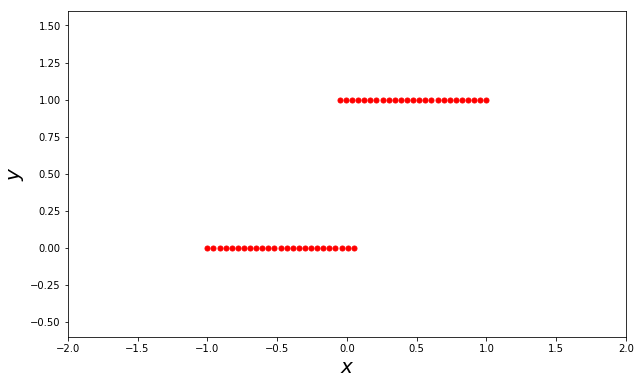

In [229]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('$x$', fontsize=20)
_ = ax.set_ylabel('$y$', fontsize=20)
xlim = (-2, 2)
ylim = (-0.6, 1.6)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/datasets/step-function.svg', 
            transparent=True, frameon=True)

### Step Function Data

<img src="../slides/diagrams/datasets/step-function.svg" class="" align="" style="vertical-align:middle;">

In [227]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

### Step Function Data GP

<img src="../slides/diagrams/gp/step-function-gp.svg" class="" align="" style="vertical-align:middle;">

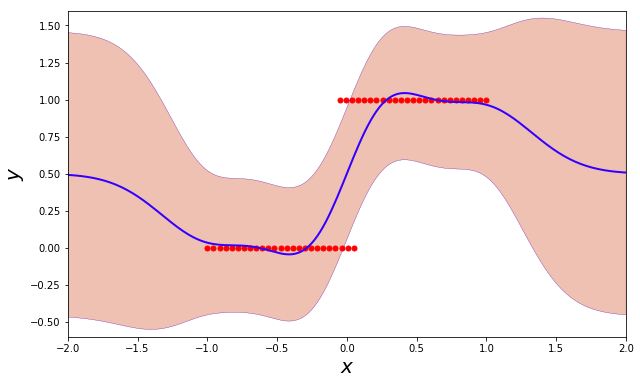

In [228]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig,filename='../slides/diagrams/gp/step-function-gp.svg', 
            transparent=True, frameon=True)

In [ ]:
layers = [y.shape[1], 1, 1, 1,x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)

In [ ]:
m.initialize()
m.staged_optimize()

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/step-function-deep-gp.svg', 
            transparent=True, frameon=True)

### Step Function Data Deep GP

<img src="../slides/diagrams/deepgp/step-function-deep-gp.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)

plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Step Function Data Deep GP

<img src="../slides/diagrams/deepgp/step-function-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='step-function',
            diagrams='../slides/diagrams/deepgp')

### Step Function Data Latent 1

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-0.svg" class="" align="" style="vertical-align:middle;">

### Step Function Data Latent 2

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-1.svg" class="" align="" style="vertical-align:middle;">

### Step Function Data Latent 3

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-2.svg" class="" align="" style="vertical-align:middle;">

### Step Function Data Latent 4

<img src="../slides/diagrams/deepgp/step-function-deep-gp-layer-3.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

### Step Function Pinball Plot

<img src="../slides/diagrams/deepgp/step-function-deep-gp-pinball.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
import pods

In [ ]:
data = pods.datasets.mcycle()
x = data['X']
y = data['Y']
scale=np.sqrt(y.var())
offset=y.mean()
yhat = (y - offset)/scale

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('time', fontsize=20)
_ = ax.set_ylabel('acceleration', fontsize=20)
xlim = (-20, 80)
ylim = (-175, 125)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(filename='../slides/diagrams/datasets/motorcycle-helmet.svg', 
            transparent=True, frameon=True)

### Motorcycle Helmet Data

<img src="../slides/diagrams/datasets/motorcycle-helmet.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

### Motorcycle Helmet Data GP

<img src="../slides/diagrams/gp/motorcycle-helmet-gp.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
import deepgp

In [ ]:
layers = [y.shape[1], 1, x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)



m.initialize()

In [ ]:
m.staged_optimize(iters=(1000,1000,10000), messages=(True, True, True))

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg', 
            transparent=True, frameon=True)

### Motorcycle Helmet Data Deep GP

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
import teaching_plots as plot
import mlai

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, xlabel='time', ylabel='acceleration/$g$', portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

### Motorcycle Helmet Data Deep GP

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-samples.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
m.visualize(xlim=xlim, ylim=ylim, scale=scale,offset=offset, 
            xlabel="time", ylabel="acceleration/$g$", portion=0.5,
            dataset='motorcycle-helmet',
            diagrams='../slides/diagrams/deepgp')

### Motorcycle Helmet Data Latent 1

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-0.svg" class="" align="" style="vertical-align:middle;">

### Motorcycle Helmet Data Latent 2

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-layer-1.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, xlabel='time', ylabel='acceleration/g', 
                    points=50, scale=scale, offset=offset, portion=0.1)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

### Motorcycle Helmet Pinball Plot

<img src="../slides/diagrams/deepgp/motorcycle-helmet-deep-gp-pinball.svg" class="" align="" style="vertical-align:middle;">

### Robot Wireless Data

The robot wireless data is taken from an experiment run by Brian Ferris
at University of Washington. It consists of the measurements of WiFi
access point signal strengths as Brian walked in a loop.

In [ ]:
data=pods.datasets.robot_wireless()

x = np.linspace(0,1,215)[:, np.newaxis]
y = data['Y']
offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y-offset)/scale

The ground truth is recorded in the data, the actual loop is given in
the plot below.

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
plt.plot(data['X'][:, 1], data['X'][:, 2], 'r.', markersize=5)
ax.set_xlabel('x position', fontsize=20)
ax.set_ylabel('y position', fontsize=20)
mlai.write_figure(figure=fig, filename='../../slides/diagrams/datasets/robot-wireless-ground-truth.svg', transparent=True, frameon=True)

### Robot Wireless Ground Truth

<img src="../slides/diagrams/datasets/robot-wireless-ground-truth.svg" class="" align="" style="vertical-align:middle;">

We will ignore this ground truth in making our predictions, but see if
the model can recover something similar in one of the latent layers.

In [ ]:
output_dim=1
xlim = (-0.3, 1.3)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x.flatten(), y[:, output_dim], 
            'r.', markersize=5)

ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
xlim = (-0.2, 1.2)
ylim = (-0.6, 2.0)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, filename='../slides/diagrams/datasets/robot-wireless-dim-' + str(output_dim) + '.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data

<img src="../slides/diagrams/datasets/robot-wireless-dim-1.svg" class="" align="" style="vertical-align:middle;">

Perform a Gaussian process fit on the data using GPy.

In [ ]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

In [ ]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, output_dim=output_dim, scale=scale, offset=offset, ax=ax, 
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='../slides/diagrams/gp/robot-wireless-gp-dim-' + str(output_dim)+ '.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data GP

<img src="../slides/diagrams/gp/robot-wireless-gp-dim-1.svg" class="" align="" style="vertical-align:middle;">

In [ ]:
layers = [y.shape[1], 10, 5, 2, 2, x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i, ARD=True)]

In [ ]:
m = deepgp.DeepGP(layers,Y=y, X=x, inits=inits, 
                  kernels=kernels,
                  num_inducing=50, back_constraint=False)
m.initialize()

In [ ]:
m.staged_optimize(messages=(True,True,True))

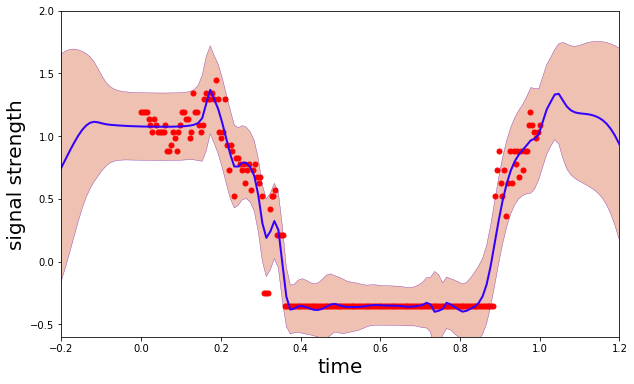

In [217]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, output_dim=output_dim, scale=scale, offset=offset, ax=ax, 
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-deep-gp-dim-' + str(output_dim)+ '.svg', 
                  transparent=True, frameon=True)

### Robot WiFi Data Deep GP

<img src="../slides/diagrams/deepgp/robot-wireless-deep-gp-dim-1.svg" class="" align="" style="vertical-align:middle;">

 /Users/neil/anaconda3/lib/python3.6/site-packages/GPy/core/gp.py:557: RuntimeWarning:covariance is not positive-semidefinite.


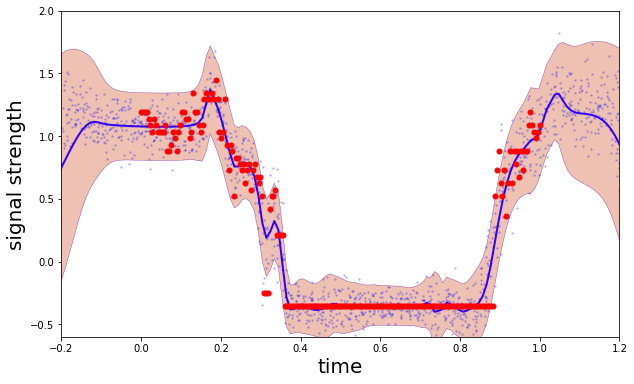

In [219]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, output_dim=output_dim, scale=scale, offset=offset, samps=10, ax=ax,
                  xlabel='time', ylabel='signal strength', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-deep-gp-samples-dim-' + str(output_dim)+ '.svg', 
                  transparent=True, frameon=True)

### Robot WiFi Data Deep GP

<img src="../slides/diagrams/deepgp/robot-wireless-deep-gp-samples-dim-1.svg" class="" align="" style="vertical-align:middle;">

### Robot WiFi Data Latent Space

<img src="../slides/diagrams/deepgp/robot-wireless-ground-truth.svg" class="" align="" style="vertical-align:middle;">

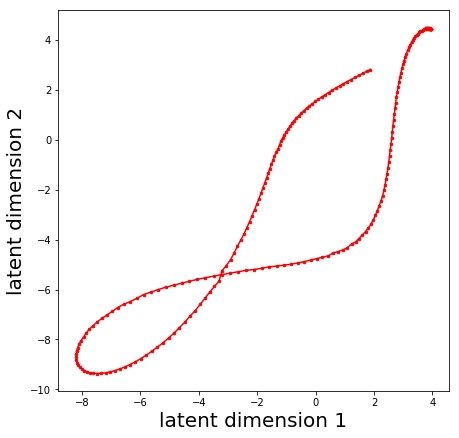

In [222]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.plot(m.layers[-2].latent_space.mean[:, 0], 
        m.layers[-2].latent_space.mean[:, 1], 
        'r.-', markersize=5)

ax.set_xlabel('latent dimension 1', fontsize=20)
ax.set_ylabel('latent dimension 2', fontsize=20)

mlai.write_figure(figure=fig, filename='../slides/diagrams/deepgp/robot-wireless-latent-space.svg', 
            transparent=True, frameon=True)

### Robot WiFi Data Latent Space

<img src="../slides/diagrams/deepgp/robot-wireless-latent-space.svg" class="" align="" style="vertical-align:middle;">

### Motion Capture

-   ‘High five’ data.
-   Model learns structure between two interacting subjects.

### Shared LVM

<img src="../slides/diagrams/shared.svg" class="" align="" style="vertical-align:middle;">

<img class="negate" src="../slides/diagrams/deep-gp-high-five2.png" width="100%" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">

<small>[Thanks to: Zhenwen Dai and Neil D.
Lawrence]{style="text-align:right"}</small>

We now look at the deep Gaussian processes' capacity to perform
unsupervised learning.

We will look at a sub-sample of the MNIST digit data set.

First load in the MNIST data set from scikit learn. This can take a
little while because it's large to download.

In [ ]:
from sklearn.datasets import fetch_mldata

In [ ]:
mnist = fetch_mldata('MNIST original')

Sub-sample the dataset to make the training faster.

In [ ]:
import numpy as np

In [ ]:
np.random.seed(0)
digits = [0,1,2,3,4]
N_per_digit = 100
Y = []
labels = []
for d in digits:
    imgs = mnist['data'][mnist['target']==d]
    Y.append(imgs[np.random.permutation(imgs.shape[0])][:N_per_digit])
    labels.append(np.ones(N_per_digit)*d)
Y = np.vstack(Y).astype(np.float64)
labels = np.hstack(labels)
Y /= 255.

### Fit a Deep GP

We're going to fit a Deep Gaussian process model to the MNIST data with
two hidden layers. Each of the two Gaussian processes (one from the
first hidden layer to the second, one from the second hidden layer to
the data) has an exponentiated quadratic covariance.

In [ ]:
import deepgp
import GPy

In [ ]:
num_latent = 2
num_hidden_2 = 5
m = deepgp.DeepGP([Y.shape[1],num_hidden_2,num_latent],
                  Y,
                  kernels=[GPy.kern.RBF(num_hidden_2,ARD=True), 
                           GPy.kern.RBF(num_latent,ARD=False)], 
                  num_inducing=50, back_constraint=False, 
                  encoder_dims=[[200],[200]])

### Initialization

Just like deep neural networks, there are some tricks to intitializing
these models. The tricks we use here include some early training of the
model with model parameters constrained. This gives the variational
inducing parameters some scope to tighten the bound for the case where
the noise variance is small and the variances of the Gaussian processes
are around 1.

In [ ]:
m.obslayer.likelihood.variance[:] = Y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)

We now we optimize for a hundred iterations with the constrained model.

In [ ]:
m.optimize(messages=False,max_iters=100)

Now we remove the fixed constraint on the kernel variance parameters,
but keep the noise output constrained, and run for a further 100
iterations.

In [ ]:
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)

Finally we unconstrain the layer likelihoods and allow the full model to
be trained for 1000 iterations.

In [ ]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

### Visualize the latent space of the top layer

Now the model is trained, let's plot the mean of the posterior
distributions in the top latent layer of the model.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import teaching_plots as plot
import mlai

In [ ]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':20})
fig, ax = plt.subplots(figsize=plot.big_figsize)
for d in digits:
    ax.plot(m.layer_1.X.mean[labels==d,0],m.layer_1.X.mean[labels==d,1],'.',label=str(d))
_ = plt.legend()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-latent.svg", transparent=True)

<img src="../slides/diagrams/usps-digits-latent.svg" class="" align="" style="vertical-align:middle;">

### Visualize the latent space of the intermediate layer

We can also visualize dimensions of the intermediate layer. First the
lengthscale of those dimensions is given by

In [ ]:
m.obslayer.kern.lengthscale

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
for i in range(5):
    for j in range(i):
        dims=[i, j]
        ax.cla()
        for d in digits:
            ax.plot(m.obslayer.X.mean[labels==d,dims[0]],
                 m.obslayer.X.mean[labels==d,dims[1]],
                 '.', label=str(d))
        plt.legend()
        plt.xlabel('dimension ' + str(dims[0]))
        plt.ylabel('dimension ' + str(dims[1]))
        mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/usps-digits-hidden-" + str(dims[0]) + '-' + str(dims[1]) + '.svg', transparent=True)

<img src="../slides/diagrams/usps-digits-hidden-1-0.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/usps-digits-hidden-2-0.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/usps-digits-hidden-3-0.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/usps-digits-hidden-4-0.svg" class="" align="" style="vertical-align:middle;">

### Generate From Model

Now we can take a look at a sample from the model, by drawing a Gaussian
random sample in the latent space and propagating it through the model.

In [ ]:

rows = 10
cols = 20
t=np.linspace(-1, 1, rows*cols)[:, None]
kern = GPy.kern.RBF(1,lengthscale=0.05)
cov = kern.K(t, t)
x = np.random.multivariate_normal(np.zeros(rows*cols), cov, num_latent).T

In [ ]:
import matplotlib.pyplot as plt
import mlai

In [ ]:
yt = m.predict(x)
fig, axs = plt.subplots(rows,cols,figsize=(10,6))
for i in range(rows):
    for j in range(cols):
        #v = np.random.normal(loc=yt[0][i*cols+j, :], scale=np.sqrt(yt[1][i*cols+j, :]))
        v = yt[0][i*cols+j, :]
        axs[i,j].imshow(v.reshape(28,28), 
                        cmap='gray', interpolation='none',
                        aspect='equal')
        axs[i,j].set_axis_off()
mlai.write_figure(figure=fig, filename="../slides/diagrams/deepgp/digit-samples-deep-gp.svg", transparent=True)

<img src="../slides/diagrams/digit-samples-deep-gp.svg" class="" align="" style="vertical-align:middle;">

<img src="../slides/diagrams/deep-health.svg" class="" align="" style="vertical-align:middle;">

-   *Gaussian process based nonlinear latent structure discovery in
    multivariate spike train data* @Anqi:gpspike2017
-   *Doubly Stochastic Variational Inference for Deep Gaussian
    Processes* @Salimbeni:doubly2017
-   *Deep Multi-task Gaussian Processes for Survival Analysis with
    Competing Risks* @Alaa:deep2017
-   *Counterfactual Gaussian Processes for Reliable Decision-making and
    What-if Reasoning* @Schulam:counterfactual17

-   *Deep Survival Analysis* @Ranganath-survival16
-   *Recurrent Gaussian Processes* @Mattos:recurrent15
-   *Gaussian Process Based Approaches for Survival Analysis*
    @Saul:thesis2016

<div style="text-align:center">

[<img class="" src="../slides/diagrams/uq/emukit-playground.png" width="80%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">](https://amzn.github.io/emukit-playground/)

</div>

<center>
<i>Emukit playground is a tutorial for understanding the
simulation/emulation relationship.</i>
</center>
<div style="text-align:center">

[<img class="negate" src="../slides/diagrams/uq/emukit-playground-bayes-opt.png" width="80%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">](https://amzn.github.io/emukit-playground/#!/learn/bayesian_optimization)

</div>

<center>
<i>Tutorial on Bayesian optimization of the number of taxis deployed
from Emukit playground.</i>
</center>
### Uncertainty Quantification

> Uncertainty quantification (UQ) is the science of quantitative
> characterization and reduction of uncertainties in both computational
> and real world applications. It tries to determine how likely certain
> outcomes are if some aspects of the system are not exactly known.

We will to illustrate different concepts of [Uncertainty
Quantification](https://en.wikipedia.org/wiki/Uncertainty_quantification)
(UQ) and the role that Gaussian processes play in this field. Based on a
simple simulator of a car moving between a valley and a mountain, we are
going to illustrate the following concepts:

-   **Systems emulation**. Many real world decisions are based on
    simulations that can be computationally very demanding. We will show
    how simulators can be replaced by *emulators*: Gaussian process
    models fitted on a few simulations that can be used to replace the
    *simulator*. Emulators are cheap to compute, fast to run, and always
    provide ways to quantify the uncertainty of how precise they are
    compared the original simulator.

-   **Emulators in optimization problems**. We will show how emulators
    can be used to optimize black-box functions that are expensive to
    evaluate. This field is also called Bayesian Optimization and has
    gained an increasing relevance in machine learning as emulators can
    be used to optimize computer simulations (and machine learning
    algorithms) quite efficiently.

-   **Multi-fidelity emulation methods**. In many scenarios we have
    simulators of different quality about the same measure of interest.
    In these cases the goal is to merge all sources of information under
    the same model so the final emulator is cheaper and more accurate
    than an emulator fitted only using data from the most accurate and
    expensive simulator.

### Mountain Car Simulator

To illustrate the above mentioned concepts we we use the [mountain car
simulator](https://github.com/openai/gym/wiki/MountainCarContinuous-v0).
This simulator is widely used in machine learning to test reinforcement
learning algorithms. The goal is to define a control policy on a car
whose objective is to climb a mountain. Graphically, the problem looks
as follows:

<div style="text-align:center;vertical-align:middle">

<img class="negate" src="../slides/diagrams/uq/mountaincar.png" width="" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<i>The mountain car simulation from the Open AI gym.</i>
</center>
The goal is to define a sequence of actions (push the car right or left
with certain intensity) to make the car reach the flag after a number
$T$ of time steps.

At each time step $t$, the car is characterized by a vector
$\inputVector_{t} = (p_t,v_t)$ of states which are respectively the the
position and velocity of the car at time $t$. For a sequence of states
(an episode), the dynamics of the car is given by

$$\inputVector_{t+1} = \mappingFunction(\inputVector_{t},\textbf{u}_{t})$$

where $\textbf{u}_{t}$ is the value of an action force, which in this
example corresponds to push car to the left (negative value) or to the
right (positive value). The actions across a full episode are
represented in a policy $\textbf{u}_{t} = \pi(\inputVector_{t},\theta)$
that acts according to the current state of the car and some parameters
$\theta$. In the following examples we will assume that the policy is
linear which allows us to write $\pi(\inputVector_{t},\theta)$ as

$$\pi(\inputVector,\theta)= \theta_0 + \theta_p p + \theta_vv.$$

For $t=1,\dots,T$ now given some initial state $\inputVector_{0}$ and
some some values of each $\textbf{u}_{t}$, we can **simulate** the full
dynamics of the car for a full episode using
[Gym](https://gym.openai.com/envs/). The values of $\textbf{u}_{t}$ are
fully determined by the parameters of the linear controller.

After each episode of length $T$ is complete, a reward function
$R_{T}(\theta)$ is computed. In the mountain car example the reward is
computed as 100 for reaching the target of the hill on the right hand
side, minus the squared sum of actions (a real negative to push to the
left and a real positive to push to the right) from start to goal. Note
that our reward depend on $\theta$ as we make it dependent on the
parameters of the linear controller.

### Emulate the Mountain Car

In [ ]:
import gym

In [ ]:
env = gym.make('MountainCarContinuous-v0')

Our goal in this section is to find the parameters $\theta$ of the
linear controller such that

$$\theta^* = arg \max_{\theta} R_T(\theta).$$

In this section, we directly use Bayesian optimization to solve this
problem. We will use [GPyOpt](https://sheffieldml.github.io/GPyOpt/) so
we first define the objective function:

In [ ]:
import mountain_car as mc
import GPyOpt

In [ ]:
obj_func = lambda x: mc.run_simulation(env, x)[0]
objective = GPyOpt.core.task.SingleObjective(obj_func)

For each set of parameter values of the linear controller we can run an
episode of the simulator (that we fix to have a horizon of $T=500$) to
generate the reward. Using as input the parameters of the controller and
as outputs the rewards we can build a Gaussian process emulator of the
reward.

We start defining the input space, which is three-dimensional:

In [ ]:
## --- We define the input space of the emulator

space= [{'name':'postion_parameter', 'type':'continuous', 'domain':(-1.2, +1)},
        {'name':'velocity_parameter', 'type':'continuous', 'domain':(-1/0.07, +1/0.07)},
        {'name':'constant', 'type':'continuous', 'domain':(-1, +1)}]

design_space = GPyOpt.Design_space(space=space)

Now we initizialize a Gaussian process emulator.

In [ ]:
model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False, exact_feval=True, ARD=True)

In Bayesian optimization an acquisition function is used to balance
exploration and exploitation to evaluate new locations close to the
optimum of the objective. In this notebook we select the expected
improvement (EI). For further details have a look to the review paper of
[Shahriari et al
(2015)](http://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf).

In [ ]:
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(design_space)
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, design_space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition) # Collect points sequentially, no parallelization.

To initalize the model we start sampling some initial points (25) for
the linear controler randomly.

In [ ]:
from GPyOpt.experiment_design.random_design import RandomDesign

In [ ]:
n_initial_points = 25
random_design = RandomDesign(design_space)
initial_design = random_design.get_samples(n_initial_points)

Before we start any optimization, lets have a look to the behavior of
the car with the first of these initial points that we have selected
randomly.

In [ ]:
import numpy as np

In [ ]:
random_controller = initial_design[0,:]
_, _, _, frames = mc.run_simulation(env, np.atleast_2d(random_controller), render=True)
anim=mc.animate_frames(frames, 'Random linear controller')

In [ ]:
from IPython.core.display import HTML

In [ ]:
HTML(anim.to_jshtml())

<iframe src="../slides/diagrams/uq/mountain_car_random.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
As we can see the random linear controller does not manage to push the
car to the top of the mountain. Now, let's optimize the regret using
Bayesian optimization and the emulator for the reward. We try 50 new
parameters chosen by the EI.

In [ ]:
max_iter = 50
bo = GPyOpt.methods.ModularBayesianOptimization(model, design_space, objective, acquisition, evaluator, initial_design)
bo.run_optimization(max_iter = max_iter )

Now we visualize the result for the best controller that we have found
with Bayesian optimization.

In [ ]:
_, _, _, frames = mc.run_simulation(env, np.atleast_2d(bo.x_opt), render=True)
anim=mc.animate_frames(frames, 'Best controller after 50 iterations of Bayesian optimization')

In [ ]:
HTML(anim.to_jshtml())

<iframe src="../slides/diagrams/uq/mountain_car_simulated.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
he car can now make it to the top of the mountain! Emulating the reward
function and using the EI helped as to find a linear controller that
solves the problem.

### Data Efficient Emulation

In the previous section we solved the mountain car problem by directly
emulating the reward but no considerations about the dynamics
$\inputVector_{t+1} = \mappingFunction(\inputVector_{t},\textbf{u}_{t})$
of the system were made. Note that we had to run 75 episodes of 500
steps each to solve the problem, which required to call the simulator
$500\times 75 =37500$ times. In this section we will show how it is
possible to reduce this number by building an emulator for $f$ that can
later be used to directly optimize the control.

The inputs of the model for the dynamics are the velocity, the position
and the value of the control so create this space accordingly.

In [ ]:
import gym

In [ ]:
env = gym.make('MountainCarContinuous-v0')

In [ ]:
import GPyOpt

In [ ]:
space_dynamics = [{'name':'position', 'type':'continuous', 'domain':[-1.2, +0.6]},
                  {'name':'velocity', 'type':'continuous', 'domain':[-0.07, +0.07]},
                  {'name':'action', 'type':'continuous', 'domain':[-1, +1]}]
design_space_dynamics = GPyOpt.Design_space(space=space_dynamics)

The outputs are the velocity and the position. Indeed our model will
capture the change in position and velocity on time. That is, we will
model

$$\Delta v_{t+1} = v_{t+1} - v_{t}$$

$$\Delta x_{t+1} = p_{t+1} - p_{t}$$

with Gaussian processes with prior mean $v_{t}$ and $p_{t}$
respectively. As a covariance function, we use a Matern52. We need
therefore two models to capture the full dynamics of the system.

In [ ]:
position_model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False, exact_feval=True, ARD=True)
velocity_model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False, exact_feval=True, ARD=True)

Next, we sample some input parameters and use the simulator to compute
the outputs. Note that in this case we are not running the full
episodes, we are just using the simulator to compute
$\inputVector_{t+1}$ given $\inputVector_{t}$ and $\textbf{u}_{t}$.

In [ ]:
import numpy as np
from GPyOpt.experiment_design.random_design import RandomDesign
import mountain_car as mc

In [ ]:
### --- Random locations of the inputs
n_initial_points = 500
random_design_dynamics = RandomDesign(design_space_dynamics)
initial_design_dynamics = random_design_dynamics.get_samples(n_initial_points)

In [ ]:
### --- Simulation of the (normalized) outputs
y = np.zeros((initial_design_dynamics.shape[0], 2))
for i in range(initial_design_dynamics.shape[0]):
    y[i, :] = mc.simulation(initial_design_dynamics[i, :])

# Normalize the data from the simulation
y_normalisation = np.std(y, axis=0)
y_normalised = y/y_normalisation

In general we might use much smarter strategies to design our emulation
of the simulator. For example, we could use the variance of the
predictive distributions of the models to collect points using
uncertainty sampling, which will give us a better coverage of the space.
For simplicity, we move ahead with the 500 randomly selected points.

Now that we have a data set, we can update the emulators for the
location and the velocity.

In [ ]:
position_model.updateModel(initial_design_dynamics, y[:, [0]], None, None)
velocity_model.updateModel(initial_design_dynamics, y[:, [1]], None, None)

We can now have a look to how the emulator and the simulator match.
First, we show a contour plot of the car aceleration for each pair of
can position and velocity. You can use the bar bellow to play with the
values of the controler to compare the emulator and the simulator.

In [ ]:
from IPython.html.widgets import interact

We can see how the emulator is doing a fairly good job approximating the
simulator. On the edges, however, it struggles to captures the dynamics
of the simulator.

Given some input parameters of the linear controlling, how do the
dynamics of the emulator and simulator match? In the following figure we
show the position and velocity of the car for the 500 time steps of an
episode in which the parameters of the linear controller have been fixed
beforehand. The value of the input control is also shown.

In [ ]:
controller_gains = np.atleast_2d([0, .6, 1])  # change the valus of the linear controller to observe the trayectories.

<img src="../slides/diagrams/uq/emu_sim_comparison.svg" class="" align="" style="vertical-align:middle;">

We now make explicit use of the emulator, using it to replace the
simulator and optimize the linear controller. Note that in this
optimization, we don't need to query the simulator anymore as we can
reproduce the full dynamics of an episode using the emulator. For
illustrative purposes, in this example we fix the initial location of
the car.

We define the objective reward function in terms of the simulator.

In [ ]:
### --- Optimize control parameters with emulator
car_initial_location = np.asarray([-0.58912799, 0]) 

### --- Reward objective function using the emulator
obj_func_emulator = lambda x: mc.run_emulation([position_model, velocity_model], x, car_initial_location)[0]
objective_emulator = GPyOpt.core.task.SingleObjective(obj_func_emulator)

And as before, we use Bayesian optimization to find the best possible
linear controller.

In [ ]:
### --- Elements of the optimization that will use the multi-fidelity emulator
model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False, exact_feval=True, ARD=True)

The design space is the three continuous variables that make up the
linear controller.

In [ ]:
space= [{'name':'linear_1', 'type':'continuous', 'domain':(-1/1.2, +1)},
        {'name':'linear_2', 'type':'continuous', 'domain':(-1/0.07, +1/0.07)},
        {'name':'constant', 'type':'continuous', 'domain':(-1, +1)}]

design_space         = GPyOpt.Design_space(space=space)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(design_space)

random_design = RandomDesign(design_space)
initial_design = random_design.get_samples(25)

We set the acquisition function to be expected improvement using
`GPyOpt`.

In [ ]:
acquisition          = GPyOpt.acquisitions.AcquisitionEI(model, design_space, optimizer=aquisition_optimizer)
evaluator            = GPyOpt.core.evaluators.Sequential(acquisition)

In [ ]:
bo_emulator = GPyOpt.methods.ModularBayesianOptimization(model, design_space, objective_emulator, acquisition, evaluator, initial_design)
bo_emulator.run_optimization(max_iter=50)

In [ ]:
_, _, _, frames = mc.run_simulation(env, np.atleast_2d(bo_emulator.x_opt), render=True)
anim=mc.animate_frames(frames, 'Best controller using the emulator of the dynamics')

In [ ]:
from IPython.core.display import HTML

In [ ]:
HTML(anim.to_jshtml())

<iframe src="../slides/diagrams/uq/mountain_car_emulated.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
And the problem is again solved, but in this case we have replaced the
simulator of the car dynamics by a Gaussian process emulator that we
learned by calling the simulator only 500 times. Compared to the 37500
calls that we needed when applying Bayesian optimization directly on the
simulator this is a great gain.

In some scenarios we have simulators of the same environment that have
different fidelities, that is that reflect with different level of
accuracy the dynamics of the real world. Running simulations of the
different fidelities also have a different cost: hight fidelity
simulations are more expensive the cheaper ones. If we have access to
these simulators we can combine high and low fidelity simulations under
the same model.

So let's assume that we have two simulators of the mountain car
dynamics, one of high fidelity (the one we have used) and another one of
low fidelity. The traditional approach to this form of multi-fidelity
emulation is to assume that

$$\mappingFunction_i\left(\inputVector\right) = \rho\mappingFunction_{i-1}\left(\inputVector\right) + \delta_i\left(\inputVector \right)$$

where $\mappingFunction_{i-1}\left(\inputVector\right)$ is a low
fidelity simulation of the problem of interest and
$\mappingFunction_i\left(\inputVector\right)$ is a higher fidelity
simulation. The function $\delta_i\left(\inputVector \right)$ represents
the difference between the lower and higher fidelity simulation, which
is considered additive. The additive form of this covariance means that
if $\mappingFunction_{0}\left(\inputVector\right)$ and
$\left\{\delta_i\left(\inputVector \right)\right\}_{i=1}^m$ are all
Gaussian processes, then the process over all fidelities of simuation
will be a joint Gaussian process.

But with Deep Gaussian processes we can consider the form

$$\mappingFunction_i\left(\inputVector\right) = \mappingFunctionTwo_{i}\left(\mappingFunction_{i-1}\left(\inputVector\right)\right) + \delta_i\left(\inputVector \right),$$

where the low fidelity representation is non linearly transformed by
$\mappingFunctionTwo(\cdot)$ before use in the process. This is the
approach taken in @Perdikaris:multifidelity17. But once we accept that
these models can be composed, a highly flexible framework can emerge. A
key point is that the data enters the model at different levels, and
represents different aspects. For example these correspond to the two
fidelities of the mountain car simulator.

We start by sampling both of them at 250 random input locations.

In [ ]:
import gym

In [ ]:
env = gym.make('MountainCarContinuous-v0')

In [ ]:
import GPyOpt

In [ ]:
### --- Collect points from low and high fidelity simulator --- ###

space = GPyOpt.Design_space([
        {'name':'position', 'type':'continuous', 'domain':(-1.2, +1)},
        {'name':'velocity', 'type':'continuous', 'domain':(-0.07, +0.07)},
        {'name':'action', 'type':'continuous', 'domain':(-1, +1)}])

n_points = 250
random_design = GPyOpt.experiment_design.RandomDesign(space)
x_random = random_design.get_samples(n_points)

Next, we evaluate the high and low fidelity simualtors at those
locations.

In [ ]:
import numpy as np
import mountain_car as mc

In [ ]:
d_position_hf = np.zeros((n_points, 1))
d_velocity_hf = np.zeros((n_points, 1))
d_position_lf = np.zeros((n_points, 1))
d_velocity_lf = np.zeros((n_points, 1))

# --- Collect high fidelity points
for i in range(0, n_points):
    d_position_hf[i], d_velocity_hf[i] = mc.simulation(x_random[i, :])

# --- Collect low fidelity points  
for i in range(0, n_points):
    d_position_lf[i], d_velocity_lf[i] = mc.low_cost_simulation(x_random[i, :])

It is time to build the multi-fidelity model for both the position and
the velocity.

As we did in the previous section we use the emulator to optimize the
simulator. In this case we use the high fidelity output of the emulator.

In [ ]:
### --- Optimize controller parameters 
obj_func = lambda x: mc.run_simulation(env, x)[0]
obj_func_emulator = lambda x: mc.run_emulation([position_model, velocity_model], x, car_initial_location)[0]
objective_multifidelity = GPyOpt.core.task.SingleObjective(obj_func)

And we optimize using Bayesian optimzation.

In [ ]:
from GPyOpt.experiment_design.random_design import RandomDesign

In [ ]:
model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False, exact_feval=True, ARD=True)
space= [{'name':'linear_1', 'type':'continuous', 'domain':(-1/1.2, +1)},
        {'name':'linear_2', 'type':'continuous', 'domain':(-1/0.07, +1/0.07)},
        {'name':'constant', 'type':'continuous', 'domain':(-1, +1)}]

design_space = GPyOpt.Design_space(space=space)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(design_space)

n_initial_points = 25
random_design = RandomDesign(design_space)
initial_design = random_design.get_samples(n_initial_points)
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, design_space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [ ]:
bo_multifidelity = GPyOpt.methods.ModularBayesianOptimization(model, design_space, objective_multifidelity, acquisition, evaluator, initial_design)
bo_multifidelity.run_optimization(max_iter=50)

In [ ]:
_, _, _, frames = mc.run_simulation(env, np.atleast_2d(bo_multifidelity.x_opt), render=True)
anim=mc.animate_frames(frames, 'Best controller with multi-fidelity emulator')

In [ ]:
from IPython.core.display import HTML

In [ ]:
HTML(anim.to_jshtml())

<iframe src="../slides/diagrams/uq/mountain_car_multi_fidelity.html" width="1024" height="768" allowtransparency="true" frameborder="0">
</iframe>
And problem solved! We see how the problem is also solved with 250
observations of the high fidelity simulator and 250 of the low fidelity
simulator.

-   *Multi-fidelity emulation*: build surrogate models when data is
    obtained from multiple information sources that have different
    fidelity and/or cost;
-   *Bayesian optimisation*: optimise physical experiments and tune
    parameters of machine learning algorithms;
-   *Experimental design/Active learning*: design the most informative
    experiments and perform active learning with machine learning
    models;
-   *Sensitivity analysis*: analyse the influence of inputs on the
    outputs of a given system;
-   *Bayesian quadrature*: efficiently compute the integrals of
    functions that are expensive to evaluate.

<div style="text-align:center;vertical-align:middle">

<img class="" src="../slides/diagrams/ml/mxfusion.png" width="70%" height="auto" align="center" style="background:none; border:none; box-shadow:none;vertical-align:middle">

</div>

<center>
<https://github.com/amzn/MXFusion>
</center>
### MxFusion

<table>
<tr>
<td width="70%">
-   Work by Eric Meissner and Zhenwen Dai.
-   Probabilistic programming.
-   Available on [Github](https://github.com/amzn/mxfusion)
    </td>
    <td width="30%">
    <img class="" src="../slides/diagrams/mxfusion-logo.png" width="" height="auto" align="" style="background:none; border:none; box-shadow:none;vertical-align:middle">
    </td>
    </tr>
    </table>

### MxFusion

### Why another framework?

### Key Requirements

Specialized inference methods + models, without requiring users to
reimplement nor understand them every time. Leverage expert knowledge.
Efficient inference, flexible framework. Existing frameworks either did
one or the other: flexible, or efficient.

### What does it look like?

**Modelling**

**Inference**

In [ ]:
m = Model()
m.mu = Variable()
m.s = Variable(transformation=PositiveTransformation())
m.Y = Normal.define_variable(mean=m.mu, variance=m.s)

-   Variable
-   Distribution
-   Function

-   `log_pdf`
-   `draw_samples`

-   Variational Inference
-   MCMC Sampling (*soon*) Built on MXNet Gluon (imperative code, not
    static graph)

In [ ]:
infr = GradBasedInference(inference_algorithm=MAP(model=m, observed=[m.Y]))
infr.run(Y=data)

-   Model + Inference together form building blocks.
    -   Just doing modular modeling with universal inference doesn't
        really scale, need specialized inference methods for specialized
        modelling objects like non-parametrics.

### Long term Aim

-   Simulate/Emulate the components of the system.
    -   Validate with real world using multifidelity.
    -   Interpret system using e.g. sensitivity analysis.
-   Perform end to end learning to optimize.
    -   Maintain interpretability.

Stefanos Eleftheriadis, John Bronskill, Hugh Salimbeni, Rich Turner,
Zhenwen Dai, Javier Gonzalez, Andreas Damianou, Mark Pullin, Eric
Meissner.

-   twitter: @lawrennd
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

### References {#references .unnumbered}